In [2]:
# necessary imports
import numpy as np
import os
import seaborn as sns
import scipy.stats as stat
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import warnings
warnings.filterwarnings("ignore")

import wrangle as wra

#testing

### Acquire data from the cloud database.

* You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

* Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
# build query and look at data
zillow_query = """
        select *
        from properties_2017
        left join predictions_2017 using (parcelid)
        left join airconditioningtype using (airconditioningtypeid)
        left join architecturalstyletype using (architecturalstyletypeid)
        left join buildingclasstype using (buildingclasstypeid)
        left join heatingorsystemtype using (heatingorsystemtypeid)
        left join propertylandusetype using (propertylandusetypeid)
        left join storytype using (storytypeid)
        left join typeconstructiontype using (typeconstructiontypeid)
            where YEAR(transactiondate) = 2017;
        """

df = wra.get_zillow_data(zillow_query)

df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
df.shape

(77613, 70)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

* Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

SUMMARY REPORT
          
          
Dataframe head: 
   typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0                     NaN          NaN                  261.0   
1                     NaN          NaN                  261.0   
2                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid  parcelid       id  basementsqft  ...  id.1  \
0                    NaN  14297519  1727539           NaN  ...     0   
1                    NaN  17052889  1387261           NaN  ...     1   
2                    NaN  14186244    11677           NaN  ...     2   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       

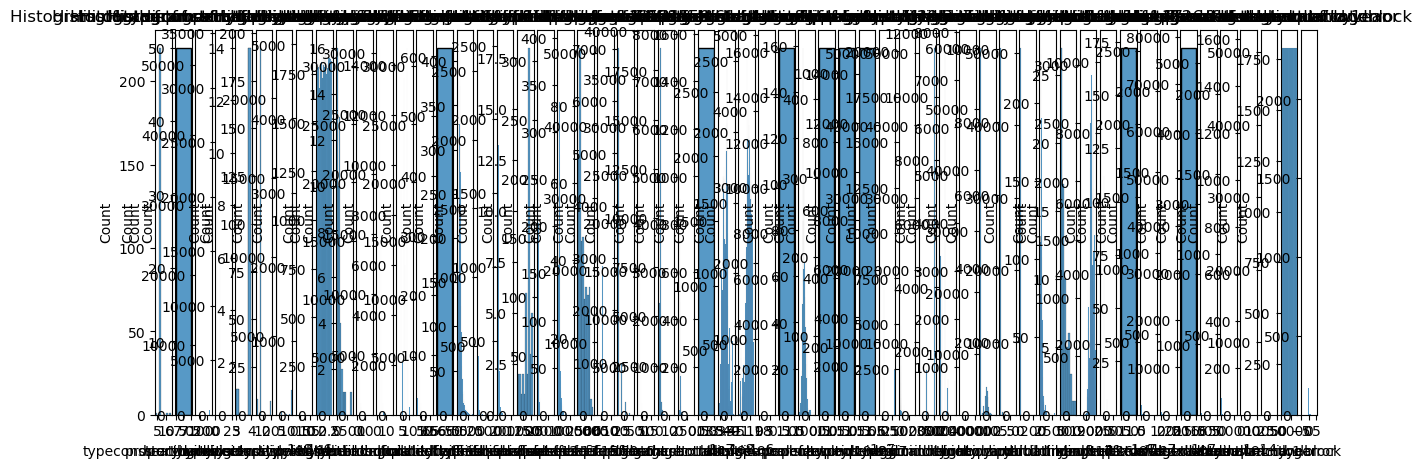

In [6]:
wra.summarize(df)

* Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [5]:
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77390,99.712677
storytypeid,77563,99.935578
propertylandusetypeid,34,0.043807
heatingorsystemtypeid,28042,36.130545
buildingclasstypeid,77598,99.980673
architecturalstyletypeid,77406,99.733292
airconditioningtypeid,52606,67.779882
parcelid,0,0.000000
id,0,0.000000
basementsqft,77563,99.935578


## Takeaways
* dtypes: float64(55), int64(3), object(11)
* 23 rows with greater than 95% missing data or nulls

## Summary complete, time to prep

In [7]:
df.propertylandusedesc.unique

<bound method Series.unique of 0        Single Family Residential
1        Single Family Residential
2        Single Family Residential
3        Single Family Residential
4                      Condominium
                   ...            
77608                  Condominium
77609    Single Family Residential
77610    Single Family Residential
77611    Single Family Residential
77612    Single Family Residential
Name: propertylandusedesc, Length: 77613, dtype: object>

In [8]:
# Get the unique values in the 'propertylandusedesc' column
unique_values = df['propertylandusedesc'].unique()

# Print the unique values
print(unique_values)

['Single Family Residential' 'Condominium'
 'Duplex (2 Units, Any Combination)' 'Residential General'
 'Planned Unit Development' 'Triplex (3 Units, Any Combination)'
 'Quadruplex (4 Units, Any Combination)' nan 'Cluster Home'
 'Commercial/Office/Residential Mixed Used' 'Cooperative'
 'Manufactured, Modular, Prefabricated Homes' 'Mobile Home' 'Townhouse']


In [9]:
# Define the values to drop
values_to_drop = ['Planned Unit Development', 'Triplex (3 Units, Any Combination)', 
                  'Quadruplex (4 Units, Any Combination)', 'Cluster Home', 
                  'Commercial/Office/Residential Mixed Used', 'Cooperative', 'Duplex (2 Units, Any Combination)']

# Drop the rows with the specified values in the 'propertylandusedesc' column
df = df[~df['propertylandusedesc'].isin(values_to_drop)]

# Print the result
print("Number of rows after dropping values:", len(df))

Number of rows after dropping values: 71998


### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
* hint:
    * Look up the dropna documentation.
    * You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [10]:
df = wra.handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75)

In [11]:
# Drop duplicates in the 'parcelid' column
df.drop_duplicates(subset='parcelid', inplace=True)

# Print the result
print("Number of rows after dropping duplicates:", len(df))

Number of rows after dropping duplicates: 71639


In [12]:
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,25068,34.992113
parcelid,0,0.000000
id,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,26678,37.239492
calculatedbathnbr,121,0.168902
calculatedfinishedsquarefeet,38,0.053044
finishedsquarefeet12,257,0.358743


In [13]:
# Get the unique values in the 'propertylandusedesc' column
unique_values = df['heatingorsystemtypeid'].unique()

# Print the unique values
print(unique_values)

[nan  2.  7.  6. 24. 13. 18. 20.  1. 10. 11.]


In [14]:
# Replace all 'nan' values in the 'heatingorsystemdesc' column with 'Yes'
df ['heatingorsystemdesc'] = df['heatingorsystemdesc'].fillna('Yes')

In [15]:
# Get the unique values in the 'propertylandusedesc' column
unique_values = df['heatingorsystemdesc'].unique()

# Print the unique values
print(unique_values)

['Yes' 'Central' 'Floor/Wall' 'Forced air' 'None' 'Radiant' 'Solar'
 'Baseboard' 'Gravity' 'Heat Pump']


In [16]:
# Replace all 'nan' values in the 'heatingorsystemtypeid' column with '24'
df['heatingorsystemtypeid'] = df['heatingorsystemtypeid'].fillna(24)

In [17]:
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,0,0.000000
parcelid,0,0.000000
id,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingqualitytypeid,26678,37.239492
calculatedbathnbr,121,0.168902
calculatedfinishedsquarefeet,38,0.053044
finishedsquarefeet12,257,0.358743


In [18]:
# Drop the specified columns from the dataframe
df = df.drop(['buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt'], axis=1)

In [19]:
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,0,0.000000
parcelid,0,0.000000
id,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedbathnbr,121,0.168902
calculatedfinishedsquarefeet,38,0.053044
finishedsquarefeet12,257,0.358743
fips,0,0.000000


In [20]:
df.shape

(71639, 32)

In [21]:
df[df.lotsizesquarefeet.isnull() == True]

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
14,266.0,24.0,14731691,2205733,2.0,2.0,2.0,970.0,970.0,6059.0,...,132425.0,2016.0,15362.0,1771.34,6.059099e+13,14,-0.008935,2017-01-02,Yes,Condominium
19,266.0,24.0,14730402,2712452,2.0,2.0,2.0,916.0,916.0,6059.0,...,245910.0,2016.0,170974.0,2548.58,6.059032e+13,19,-0.012041,2017-01-02,Yes,Condominium
35,266.0,2.0,10891778,1580810,3.0,2.0,3.0,1480.0,1480.0,6037.0,...,367967.0,2016.0,194806.0,4499.16,6.037124e+13,35,-0.002520,2017-01-02,Central,Condominium
39,266.0,24.0,14703637,1684866,2.5,2.0,2.5,1024.0,1024.0,6059.0,...,418000.0,2016.0,263000.0,4244.64,6.059042e+13,39,-0.023185,2017-01-02,Yes,Condominium
55,266.0,24.0,17153340,1327940,3.5,2.0,3.5,4018.0,4018.0,6111.0,...,1044060.0,2016.0,522030.0,12738.54,6.111004e+13,55,-0.095340,2017-01-02,Yes,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77326,266.0,20.0,12509316,1207651,3.0,4.0,3.0,2301.0,2301.0,6037.0,...,615612.0,2016.0,326268.0,7420.62,6.037575e+13,77326,0.047961,2017-09-18,Solar,Condominium
77334,266.0,2.0,12865998,253395,3.0,3.0,3.0,1510.0,1510.0,6037.0,...,416252.0,2016.0,208126.0,4974.87,NaN,77334,-0.018837,2017-09-18,Central,Condominium
77352,266.0,2.0,11542519,1058299,2.0,2.0,2.0,900.0,900.0,6037.0,...,456861.0,2016.0,137058.0,5449.32,6.037275e+13,77352,0.014974,2017-09-19,Central,Condominium
77443,266.0,2.0,13051048,1983609,3.0,3.0,3.0,1781.0,1781.0,6037.0,...,517776.0,2016.0,243456.0,6197.00,6.037400e+13,77443,0.089354,2017-09-19,Central,Condominium


In [22]:
# Get the value counts for the 'propertylandusedesc' column
value_counts = df['propertylandusedesc'].value_counts()
value_counts

Single Family Residential                     52256
Condominium                                   19236
Mobile Home                                      63
Manufactured, Modular, Prefabricated Homes       51
Residential General                              27
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [23]:
# Filter the dataframe to only include rows where the 'propertylandusedesc' column is 'Condominium'
condo_df = df[df['propertylandusedesc'] == 'Condominium']

# Count the number of NaN values in the 'lotsizesquarefeet' column for the filtered dataframe
num_nan = condo_df['lotsizesquarefeet'].isna().sum()

# Print the result
print(f"There are {num_nan} Condominiums with NaN values in the 'lotsizesquarefeet' column.")

There are 7685 Condominiums with NaN values in the 'lotsizesquarefeet' column.


In [24]:
# Replace all NaN values with 0 in the 'lotsizesquarefeet' column where the 'propertylandusedesc' column has 'Condominium'
condo_idx = df[df['propertylandusedesc'] == 'Condominium'].index
df.loc[condo_idx, 'lotsizesquarefeet'] = df.loc[condo_idx, 'lotsizesquarefeet'].fillna(0)

In [25]:
# look at the remaining nulls
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,0,0.000000
parcelid,0,0.000000
id,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedbathnbr,121,0.168902
calculatedfinishedsquarefeet,38,0.053044
finishedsquarefeet12,257,0.358743
fips,0,0.000000


In [26]:
df.shape

(71639, 32)

In [9]:
df.regionidcounty.nunique()

3

In [10]:
df.propertycountylandusecode.unique()

array(['122', '1110', '0101', '010C', '1129', '0100', '38', '34', '1111',
       '012C', '010V', '1', '0103', '010D', '0200', '010E', '0300', '96',
       '0104', '0400', '01DC', '01HC', nan, '1321', '1410', '0108',
       '1128', '010G', '1720', '010H', '1210', '0102', '010F', '010M',
       '1117', '0201', '0700', '1722', '73', '0109', '0301', '01HE',
       '135', '0204', '0401', '070D', '0113', '0133', '0131', '1432',
       '040G', '1112', '1222', '1310', '1120', '0111', '1116', '1421',
       '0110', '0105', '012E', '0141', '1333', '0115', '040V', '010L',
       '040B', '012D', '0114', '0203', '030G', '0130', '105', '020G',
       '020M', '020E'], dtype=object)

In [27]:
df = df.dropna()

In [28]:
#final shape after all drops
df.shape

(69442, 32)

In [29]:
# show we have no nulls
wra.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
propertylandusetypeid,0,0.0
heatingorsystemtypeid,0,0.0
parcelid,0,0.0
id,0,0.0
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedbathnbr,0,0.0
calculatedfinishedsquarefeet,0,0.0
finishedsquarefeet12,0,0.0
fips,0,0.0


In [ ]:
def wrangle_zillow(df):
    '''takes in df, cleans df, uses function to handle_missing_values, handling nans'''
    
    # Define the values to drop
    values_to_drop = ['Planned Unit Development', 'Triplex (3 Units, Any Combination)', 
                      'Quadruplex (4 Units, Any Combination)', 'Cluster Home', 
                      'Commercial/Office/Residential Mixed Used', 'Cooperative']

    # Drop the rows with the specified values in the 'propertylandusedesc' column
    df = df[~df['propertylandusedesc'].isin(values_to_drop)]
    
    # see function above
    df = wra.handle_missing_values(df, prop_required_columns=0.5, prop_required_rows=0.75)
    
    # Drop duplicates in the 'parcelid' column
    df.drop_duplicates(subset='parcelid', inplace=True)
    
    # Replace all 'nan' values in the 'heatingorsystemdesc' column with 'Yes'
    df ['heatingorsystemdesc'] = df['heatingorsystemdesc'].fillna('Yes')
    
    # Replace all 'nan' values in the 'heatingorsystemtypeid' column with '24'
    df['heatingorsystemtypeid'] = df['heatingorsystemtypeid'].fillna(24)
    
    # Drop the specified columns from the dataframe
    df = df.drop(['buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt'], axis=1)
    
    condo_idx = df[df['propertylandusedesc'] == 'Condominium'].index
    df.loc[condo_idx, 'lotsizesquarefeet'] = df.loc[condo_idx, 'lotsizesquarefeet'].fillna(0)
    
    df = df.dropna()
   
    return df

In [7]:
#show the function works
wra.wrangle_zillow(df)

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,24.0,14297519,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Yes,Single Family Residential
1,261.0,24.0,17052889,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Yes,Single Family Residential
2,261.0,24.0,14186244,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Yes,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,266.0,2.0,10887214,1970746,3.0,3.0,3.0,1312.0,1312.0,6037.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,266.0,2.0,10833991,2864704,3.0,3.0,3.0,1741.0,1741.0,6037.0,...,379000.0,2016.0,114000.0,4685.34,6.037132e+13,77608,-0.002245,2017-09-20,Central,Condominium
77609,261.0,2.0,11000655,673515,2.0,2.0,2.0,1286.0,1286.0,6037.0,...,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Central,Single Family Residential
77610,261.0,24.0,17239384,2968375,2.0,4.0,2.0,1612.0,1612.0,6111.0,...,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,Yes,Single Family Residential
77611,261.0,2.0,12773139,1843709,1.0,3.0,1.0,1032.0,1032.0,6037.0,...,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Central,Single Family Residential


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
typeconstructiontypeid,223.0,6.040359e+00,5.560348e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,1.300000e+01
storytypeid,50.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
propertylandusetypeid,77579.0,2.618245e+02,5.141596e+00,3.100000e+01,2.610000e+02,2.610000e+02,2.660000e+02,2.750000e+02
heatingorsystemtypeid,49571.0,3.921749e+00,3.594780e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
architecturalstyletypeid,207.0,7.386473e+00,2.728030e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
airconditioningtypeid,25007.0,1.812013e+00,2.965768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
parcelid,77613.0,1.300781e+07,3.518717e+06,1.071186e+07,1.153821e+07,1.253004e+07,1.421101e+07,1.676893e+08
id,77613.0,1.496044e+06,8.613434e+05,3.490000e+02,7.525860e+05,1.499178e+06,2.242065e+06,2.985182e+06
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03


## Part II Mall Customers

In [3]:
# build query and look at data
mall_query = """
        SELECT *
        FROM customers
        """

df = wra.get_mall_data(mall_query)

df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
mall_df = df

In [10]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
wra.summarize(mall_df)

SUMMARY REPORT
          
          
Dataframe head: 
   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


KeyError: "['parcelid'] not in index"

In [13]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [14]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Note: 
Quartiles


- data is split into 4 equal parts 
- a quartile represents one of these bins that captures exactly 25% of the data 
- 25% / 25% / 25% / 25% 
Bounds/IQR

lower bound: Q1-(k*IQR)

- upper bound: Q3+(k*IQR)

In [16]:
#let's find our quantiles for age
mall_df['age'].quantile([0.25,0.75])

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [17]:
#another way to do this, numpy percentile function
q1, q3= np.percentile(mall_df['age'], [25, 75])
q1, q3

(28.75, 49.0)

In [18]:
#yet another way to do this, numpy quantile function
q1, q3 = np.quantile(mall_df['age'], [0.25, 0.75])
q1, q3

(28.75, 49.0)

In [19]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1, q3 = df[feature].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + (m * iqr)
    lower_bound = q1 - (m * iqr)
    
    print(f'For {feature}, the lower bound is {lower_bound} and  upper bound is {upper_bound}')
    
    return upper_bound, lower_bound

In [20]:
ageUP, ageLOW = outlier(mall_df, 'age')

For age, the lower bound is -1.625 and  upper bound is 79.375


In [21]:
ageUP, ageLOW

(79.375, -1.625)

In [22]:
#identify numeric columns only
num_df = mall_df.select_dtypes(exclude=object)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [23]:
##identify discrete columns only
disc_df = mall_df.select_dtypes(include=object)
disc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [24]:
#let's iterate through the list of numeric columns 
##to find the upper and lower bounds
cols = num_df.columns.to_list()    

for col in cols:
    outlier(num_df, col)

For customer_id, the lower bound is -98.5 and  upper bound is 299.5
For age, the lower bound is -1.625 and  upper bound is 79.375
For annual_income, the lower bound is -13.25 and  upper bound is 132.75
For spending_score, the lower bound is -22.625 and  upper bound is 130.375


In [44]:
def train_test_split(df, target, seed=123):
    '''
    accepts dataframe and splits the data into train, validate and test 
    '''
    train_validate, test = train_test_split(df)
    
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=seed)
    return train, validate, test

In [45]:
#function from wrangle.py
def split_data(df, target):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, target)
    #create train and validate datasets
    train, validate = train_test_split(train, seed = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [46]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(mall_df, 'spending_score')


TypeError: train_test_split() missing 1 required positional argument: 'target'

In [47]:
#Check get_dummies works as expected on my training data
dummy_df = pd.get_dummies(train)
dummy_df

NameError: name 'train' is not defined

In [48]:
def encoding(df, cols, drop_first=True):
    '''
    Take in df and list of columns
    add encoded columns derived from columns in list to the df
    '''
    for col in cols:

        dummies = pd.get_dummies(df[f'{col}'], drop_first=drop_first) # get dummy columns

        df = pd.concat([df, dummies], axis=1) # add dummy columns to df
        
    return df

In [49]:
train_encoded = encoding(train, disc_df , drop_first=True)

NameError: name 'train' is not defined

In [50]:
#count of nulls in the df
mall_df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [52]:
#use null value counter function
null_malldf = wra.nulls_by_col(mall_df)

#take a look
null_malldf.sort_values(by='percent_rows_missing', ascending=False)

,num_rows_missing,percent_rows_missing
customer_id,0,0.0
gender,0,0.0
age,0,0.0
annual_income,0,0.0
spending_score,0,0.0


In [53]:
train_encoded.info()

NameError: name 'train_encoded' is not defined

In [ ]:
#create the scaler
mms = MinMaxScaler()

#fit the scaler on the desired columns
train_encoded[['age', 'annual_income']] = mms.fit_transform(train_encoded[['age','annual_income']])

#take a look
train_encoded.head()